In [42]:
import numpy as np
import seaborn as sns
import pandas as pd

## Excersize 04

### Q1

The formula for the Tailor series is:  
$$f(x)=\sum_{k=0}^\infty f^{(k)}(a)\frac{(x-a)^k}{k!}$$

The Tailor expansion of $\sin(x)$ about $0$ is:

$$f(x)=\sum_{k=0}^\infty f^{(k)}(a)\frac{(x)^k}{k!}$$


In [16]:
from math import factorial, sin

def Sin_TailorExpansion(x: float, maximumOrder: int = 5) -> float:
    """
    Calculate Tailor expansion for sin(x) for small values of x.
    
    x
       Value to compute in Tailor expansion
    maximumOrder
       Maximum order of Tailor expansion
    """
    value = 0
    # Each iteration of this is 2n orders of Tailor expansion
    for order in range(maximumOrder // 2):
        value = value + ((-1)**order * (x)**(2*order+1)) / factorial(2*order+1)
    return value

In [17]:
Q1value = 0.1
Q1order = 5
Q1result = Sin_TailorExpansion(Q1value, Q1order)
print(Q1result)

0.09983333333333334


### Q3

In [19]:
print(f"The value of sin({Q1value} approximated using Tailor Expansion to {Q1order} is {Q1result:.5f}")
print(f"This is accurate to {(sin(0.1)/Q1result-1)*100:.05f}%")

The value of sin(0.1 approximated using Tailor Expansion to 5 is 0.09983
This is accurate to 0.00008%


### Q4
Firstly my niave prime sieve implementation

In [94]:
from itertools import compress

def PrimeSieve(limit):
    """
    Prime sieve to find prime numbers
    
    Inputs:
    
    limit 
        Inclusive limit to search for primes
    
    Outputs:
    
    List 
        Prime numbers found under the limit
    """
    if limit<2:
        return []
    numbers = [False]*2 + [True]*(limit-1)
    
    for number, isPrime in enumerate(numbers):
        if isPrime:
            prime = number
            numbers[prime*2::prime] = [False]*len(numbers[prime*2::prime])
    
    return list(compress(np.arange(0,len(numbers)), numbers))

In [97]:
print(PrimeSieve(100))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


### Q4

In [92]:
def RecamanGenerator(limit: int) -> list[int]:
    """
    Compute Recaman numbers up to a certain term.
    
    limit 
        Maximum term to compute of Recaman numbers.
        
    Output:
    List
        Recaman numbers up to term as defined in limit.
    """
    
    recamanSeries = [0]*limit
    lastValue = 0
    
    for term in range(1, limit):
        if lastValue-term > 0 and not(lastValue-term in recamanSeries):
            lastValue -= term
        else: 
            lastValue += term
        recamanSeries[term] = lastValue
    return recamanSeries

In [99]:
print(RecamanGenerator(10))

[0, 1, 3, 6, 2, 7, 13, 20, 12, 21]


### Q5

In [102]:
def MatchingRecamanAndPrimes(limit):
    """
    Compute list of numbers that match in the Recaman numbers and primes up to a limit
    
    Input:
    
    Limit 
        Maximum term to compare between prime and Recaman numbers
        
    Output:
    
    List
        List of numbers that match between Recaman and prime numbers up to the limit
    """
    recamanNumbers = RecamanGenerator(limit)
    primeNumbers = PrimeSieve(limit)
    return list(set(primeNumbers) & set(recamanNumbers))    

In [103]:
MatchingRecamanAndPrimes(10)

[2, 3, 7]

### Q6

In [117]:
from math import floor 

valueToDecompose = 64

maximumFactor = floor(valueToDecompose**0.5)
pairs = [(lowFactor, valueToDecompose // lowFactor) for lowFactor in range(2, maximumFactor+1) if (valueToDecompose%lowFactor == 0)]

print(f"The prime factors of {valueToDecompose} are:")
print(f"{pairs}")

8
The prime factors of 64 are:
[(2, 32), (4, 16), (8, 8)]


### Q7

In [134]:
from random import randint
from random import seed as setSeed
from os import urandom

def RandomWalk(terminalValue: int, step: int = 1, seed = int.from_bytes(urandom(16), 'big')) -> list[int]:
    """
    Generate a random walk 
    
    Inputs:
    
    terminalValue
        The displacement the generator terminates at
    step
        Unit of displacement per step
    seed 
        Random seed used to generate the random walk. Set manually for consistency.
    """
    
    setSeed(seed)
    pos = 0
    
    posHistory = [0]
    while pos < terminalValue:
        
        if randint(0,1):
            pos += step
        else: 
            pos -= step
            
        posHistory.append(pos)
        
    return posHistory

In [138]:
terminalValue = 10
seed = 42
print(f"It took {len(RandomWalk(terminalValue, seed=seed))} steps to reach a displacement of {terminalValue}")

It took 813 steps to reach a displacement of 10


## Excersize 5 

### Q1 - NEED TO DO

### Q2

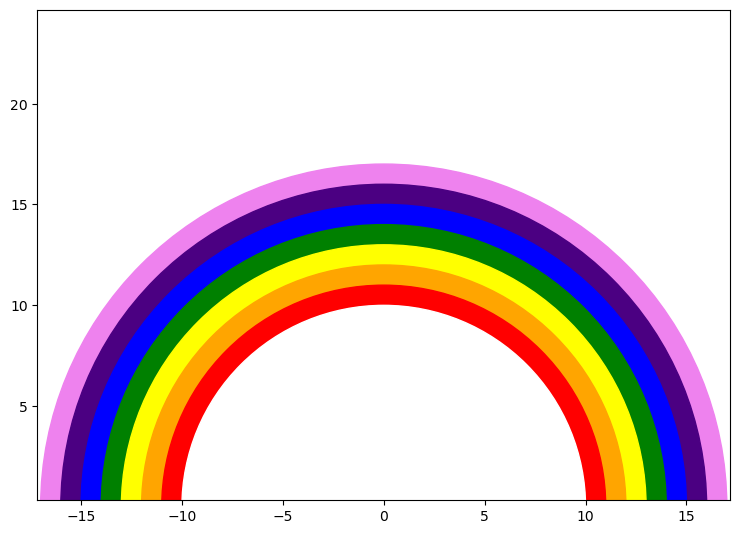

In [166]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 5.50]

fig, ax = plt.subplots()
# fig.figsize(5, 5)
plt.axis("equal")

ax.set(xlim=(-30, 30), ylim=(0, 25))

rainbow = ['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red']+['white']*10

for i in range(len(rainbow)):
   c = plt.Circle((0, 0), 
                  len(rainbow)-i, 
                  fill=True, 
                  color=rainbow[i])
   ax.add_artist(c)

plt.show()

### Q3 - NEED TO DO

## Excersize 5

In [309]:
from math import floor

class Fraction():
    def __init__(self, numerator: int, denominator: int):
        self.sanitise(numerator, denominator)
        
        self.numerator = abs(numerator)
        self.denominator = abs(denominator)
        self.isPositive = True if ((numerator>0) and (denominator>0)) or ((numerator<0) and (denominator<0)) else False
        
        self.simplify()
    
    def sanitise(self, numerator, denominator):
        if denominator == 0:
            raise ZeroDivisionError
    
    def checkWholeNumber(self):
        return (self.numerator % self.denominator == 0) or (self.numerator == 0)
    
    def simplify(self):
        if self.checkWholeNumber():
            self.numerator = self.numerator // self.denominator
            self.denominator = 1
        else:
            self.numeratorFactors = self.factorise(self.numerator)
            self.denominatorFactors = self.factorise(self.denominator)
            
            print(self.numeratorFactors)
            print(self.denominatorFactors)
            
            # Intersection of the two lists of factors
            commonFactors = list(set(self.numeratorFactors) & set(self.denominatorFactors))
            
            for i, factor in enumerate(commonFactors):

                self.numerator = self.numerator // factor
                del self.numeratorFactors[self.numeratorFactors.index(factor)]

                self.denominator = self.denominator // factor
                del self.denominatorFactors[self.denominatorFactors.index(factor)]
        
    def multiply(self, factor):
        self.numerator *= factor
        self.simplify()
        return (self)
    
    def factorise(self, valueToDecompose):
        factors = []
        maximumFactor = floor(valueToDecompose**0.5)
        
        for lowFactor in range(2, maximumFactor+1):
            if valueToDecompose % lowFactor == 0:
                factors.append(lowFactor)
                factors.append(valueToDecompose // lowFactor)
                
        return factors
    
    def __mul__(self, factor):
        return self.multiply(factor)
    def __rmul__(self, factor):
        return self.multiply(factor)
    def __str__(self):
        if self.checkWholeNumber():
            sign = (-1)**int(self.isPositive == False)
            return str(sign * self.numerator)
        else:
            return f"{'' if self.isPositive else '-'}{self.numerator}/{self.denominator}"

In [321]:
print(Fraction(2,4))

[]
[2, 2]
2/4


In [318]:
def FractionTests():
        # expected = 
        # actual = 
        # assert expected == actual    
    def test():
        fractional_initial_values()
        factorising_fractional_initial_values()
        initial_initial_values()
        negative_initial_values()
    
    
    def fractional_initial_values():
        expected = "2/3"
        actual = str(Fraction(2,3))
        assert expected == actual
        
        expected = "9/2"
        actual = str(Fraction(9, 2))
        assert expected == actual
    
    def factorising_fractional_initial_values():
        expected = "1/2"
        actual = str(Fraction(4,8))
        assert expected == actual  
        
        expected = "2/5"
        actual = str(Fraction(20,50))
        assert expected == actual  
        

    def integer_initial_values():    
        expected = "6"
        actual = str(Fraction(6, 1))
        assert expected == actual

        expected = "3"
        actual = str(Fraction(6, 2))
        assert expected == actual

        expected = "1"
        actual = str(Fraction(3, 3))
        assert expected == actual
    
    def negative_initial_values():
        expected = "-2/3"
        actual = str(Fraction(-2, 3))
        assert expected == actual

        expected = "-2/3"
        actual = str(Fraction(2, -3))
        assert expected == actual

        expected = "2/3"
        actual = str(Fraction(-2, -3))
        assert expected == actual
    
    test()

In [319]:
FractionTests()

[]
[]
[3, 3]
[]
[2, 2]
[2, 4]


AssertionError: 